In [1]:
#Loading all the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\STANMARX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\STANMARX\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\STANMARX\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\STANMARX\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\STANMARX\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
#Explore lemmatization vs stemming

lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti', 'sings', 'hopped', 'rocks', 'better', 'easily']
pos = ['n', 'v', 'v', 'n', 'a', 'r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("Lemmatized words:", lemmatized_words)
print("Stemmed words:", stemmed_words)

Lemmatized words: ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words: ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [4]:
#Lets now create a function to apply all of our data preprocessing steps which we can then use on a corpus

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] # Stemming
  return stemmed_text

In [5]:
#Reading my dataset
mydataset = pd.read_csv("Tourists_reviews.txt",sep="\t", encoding='cp1252')
mydataset.columns = ["Location","Hotel/Restaurant_name","Reviews"]


mydataset.head()

,Location,Hotel/Restaurant_name,Reviews
0,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,NaN,NaN,"Quietly set off the main road, nice atmosphere..."
2,NaN,NaN,I made a reservation for a birthday two days i...
3,NaN,NaN,We visit here regularly and never fail to be i...
4,NaN,NaN,Visited this wonderful place on my travels and...


In [6]:
#Preprocessing of data, dropping empty cells
newdata = mydataset.dropna()

newdata 



,Location,Hotel/Restaurant_name,Reviews
0,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
98,Kathu,Thai Express - Turtle Village,"Ordered the Mud crabs in yellow curry sauce, t..."
198,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...
199,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
200,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
...,...,...,...
2949,Rawai,Cashew Nuts Food,I was staying around this restaurant so I just...
2950,Rawai,Cashew Nuts Food,"In a quiet neighbourhood, gets lots of repeat ..."
2951,Rawai,Cashew Nuts Food,Went for dinner and was enthusiastically greet...
2952,Rawai,Cashew Nuts Food,You're not going to get fine dining or anythin...


In [7]:
#Checking for any empty cells
newdata.isnull()

,Location,Hotel/Restaurant_name,Reviews
0,False,False,False
98,False,False,False
198,False,False,False
199,False,False,False
200,False,False,False
...,...,...,...
2949,False,False,False
2950,False,False,False
2951,False,False,False
2952,False,False,False


In [8]:
#preprocessing for Bag-of-words model
newdata['Reviews'] = newdata['Reviews'].apply(preprocess_text)
newdata.head()

C:\Users\STANMARX\AppData\Local\Temp\ipykernel_13484\1826362523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Reviews'] = newdata['Reviews'].apply(preprocess_text)


,Location,Hotel/Restaurant_name,Reviews
0,Kathu,Thong Dee The Kathu Brasserie,"[sunday, roast, lamb, beef, truli, excel, 11ou..."
98,Kathu,Thai Express - Turtle Village,"[order, mud, crab, yellow, curri, sauc, pictur..."
198,Patong,Sam's Steaks and Grill,"[expens, comparison, local, restaur, that', ap..."
199,Patong,Sam's Steaks and Grill,"[walk, pass, holiday, inn, decid, last, minut,..."
200,Patong,Sam's Steaks and Grill,"[atmospher, 70', great, comfort, armchair, eff..."


# SENTIMENT ANALYSIS

In [9]:
print(preprocess_text('This movie is great'))
print(preprocess_text('This movie is not great'))

['movi', 'great']
['movi', 'great']


In [10]:
#Using VADER Model
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This movie is great!'))
print(sentiment.polarity_scores('This movie is not great'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [11]:
#Creating new data frame for the existing dataset
newdata2 = mydataset.dropna()

In [12]:
#Using list comprehension to create new columns for polarity score
newdata2['compound'] = [sentiment.polarity_scores(review)['compound'] for review in newdata2['Reviews']]
newdata2['neg'] = [sentiment.polarity_scores(review)['neg'] for review in newdata2['Reviews']]
newdata2['neu'] = [sentiment.polarity_scores(review)['neu'] for review in newdata2['Reviews']]
newdata2['pos'] = [sentiment.polarity_scores(review)['pos'] for review in newdata2['Reviews']]

C:\Users\STANMARX\AppData\Local\Temp\ipykernel_13484\736530334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata2['compound'] = [sentiment.polarity_scores(review)['compound'] for review in newdata2['Reviews']]
C:\Users\STANMARX\AppData\Local\Temp\ipykernel_13484\736530334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata2['neg'] = [sentiment.polarity_scores(review)['neg'] for review in newdata2['Reviews']]
C:\Users\STANMARX\AppData\Local\Temp\ipykernel_13484\736530334.py:4: SettingWithCo

In [13]:
#View the contents
newdata2.head()

,Location,Hotel/Restaurant_name,Reviews,compound,neg,neu,pos
0,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,0.0516,0.11,0.772,0.118
98,Kathu,Thai Express - Turtle Village,"Ordered the Mud crabs in yellow curry sauce, t...",-0.2716,0.07,0.883,0.047
198,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,0.8674,0.00,0.821,0.179
199,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,0.4939,0.00,0.903,0.097
200,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",0.9839,0.00,0.543,0.457


In [14]:
newdata2[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,2758.000000,2758.000000,2758.000000,2758.000000
mean,0.710214,0.023791,0.727412,0.248803
std,0.379202,0.044938,0.127492,0.133677
min,-0.915300,0.000000,0.295000,0.000000
25%,0.669150,0.000000,0.642000,0.149250
50%,0.871350,0.000000,0.733000,0.243000
75%,0.934375,0.039000,0.819000,0.341000
max,0.990400,0.354000,1.000000,0.705000


<AxesSubplot:xlabel='compound', ylabel='Count'>

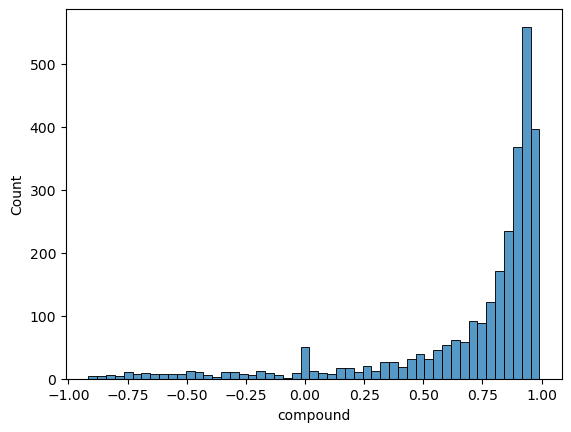

In [15]:
sns.histplot(newdata2['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

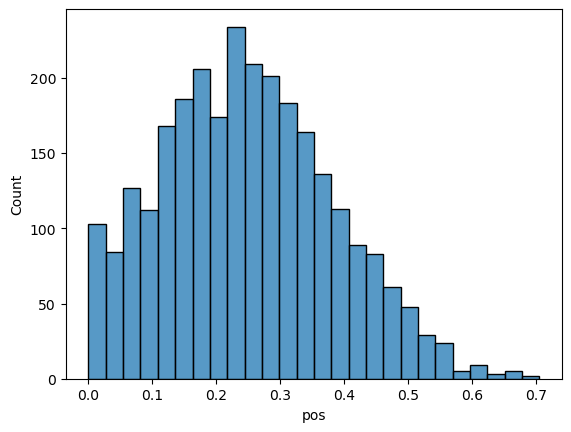

In [16]:
sns.histplot(newdata2['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

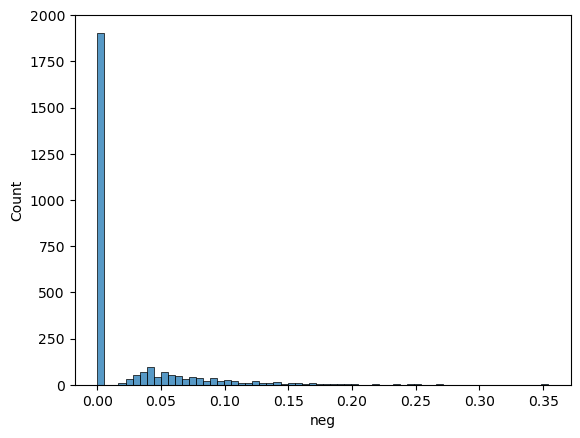

In [17]:
sns.histplot(newdata2['neg'])

In [18]:
#looking at how many negative reviews we have per hotel/restaurant

(newdata2['compound']<=0).groupby(newdata2['Hotel/Restaurant_name']).sum()

Hotel/Restaurant_name
Benny's American Bar & Grill               5
Black Ginger                               6
Bollywood Phuket Restaurant & Bar          6
Breeze at Cape Yamu                        5
Cashew Nuts Food                          11
Chaba                                     22
Da Puccio Restaurant                      11
EAT. bar & grill                           4
Flavor Phuket                              6
Green Tamarind Kitchen                    10
Grill Bill                                 5
Honeymoon Thai Restaurant by Kenya        10
Istanbul Turkish Restaurant                8
Les Diables                                3
Macarona - European Cuisine & Pizzeria    10
O-OH Farm Suanluang                        2
One Chun Cafe and Restaurant               6
Pad Thai Shop                              7
Pooh and Friends                           7
Rayaan's Oriental Restaurant              32
Sabai Corner                               3
Sala Sawasdee Lobby Bar          

In [19]:
#Calculate as percentage of total reviews per hotel/restaurant

percent_negative = pd.DataFrame((newdata2['compound']<=0).groupby(newdata2['Hotel/Restaurant_name']).sum()
                                /newdata2['Hotel/Restaurant_name'].groupby(newdata2['Hotel/Restaurant_name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
Hotel/Restaurant_name,
Thong Dee The Kathu Brasserie,0.000000
Sam's Steaks and Grill,1.000000
The Cove Phuket,2.000000
O-OH Farm Suanluang,2.061856
Surin Chill House,2.083333
Sabai Corner,3.000000
Les Diables,3.225806
Shameena Restaurant and Lounge,3.296703
EAT. bar & grill,4.000000


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant_name'>

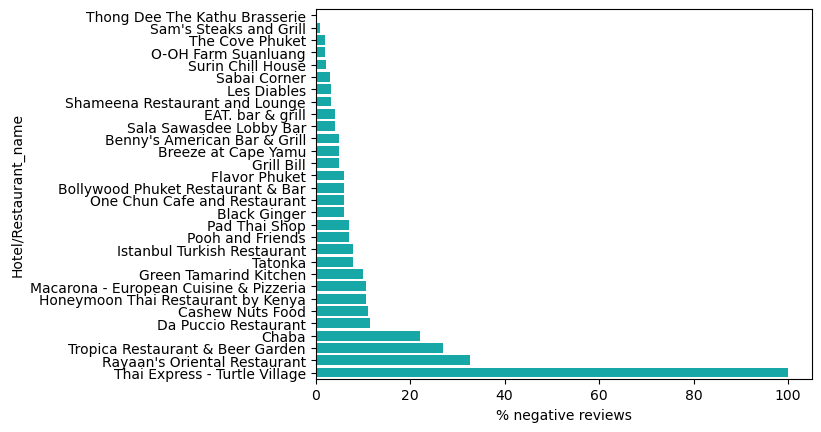

In [20]:
#ploting the above as barplot
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

In [21]:
#process the text data ready for worldcup visualisation, using the function we defined earlier
# For this part of the exercise, we will focus speciically on one hotel, Tatonka

newdata2['processed_review'] = newdata2['Reviews'].apply(preprocess_text)

newdata2_positive_subset = newdata2.loc[(newdata2['Hotel/Restaurant_name']=='Tatonka')
                                  &(newdata2['compound']>0),:]

newdata2_negative_subset = newdata2.loc[(newdata2['Hotel/Restaurant_name']=='Tatonka')
                                  &(newdata2['compound']<=0),:] 

newdata2_positive_subset.head()

C:\Users\STANMARX\AppData\Local\Temp\ipykernel_13484\2205581626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata2['processed_review'] = newdata2['Reviews'].apply(preprocess_text)


,Location,Hotel/Restaurant_name,Reviews,compound,neg,neu,pos,processed_review
1183,Thalang District,Tatonka,Really great family run restaurant with Harold...,0.7645,0.074,0.725,0.200,"[realli, great, famili, run, restaur, harold, ..."
1184,Thalang District,Tatonka,This is really a very interesting restaurant t...,0.2313,0.082,0.790,0.129,"[realli, interest, restaur, think, never, got,..."
1185,Thalang District,Tatonka,We have been going to Thailand for over 7 year...,0.2732,0.045,0.886,0.069,"[go, thailand, 7, year, alway, enjoy, meal, ta..."
1186,Thalang District,Tatonka,We first visited Tatonka over 10 years ago and...,0.9336,0.000,0.739,0.261,"[first, visit, tatonka, 10, year, ago, back, t..."
1187,Thalang District,Tatonka,Loved the appetizers. Very good service and th...,0.8858,0.000,0.591,0.409,"[love, appet, good, servic, offer, free, trans..."


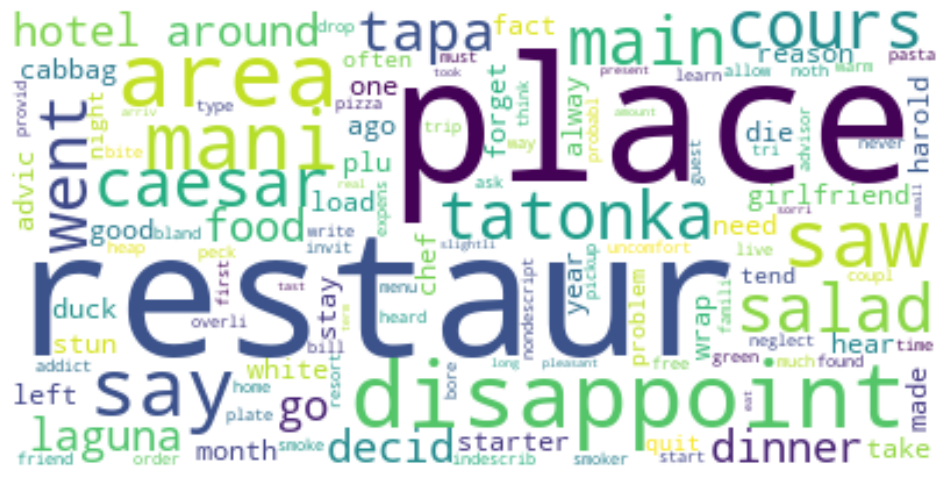

In [22]:
#Wordcloud of words from negative reviews by hotel/restaurant

neg_tokens = [word for review in newdata2_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
     ' '.join(neg_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

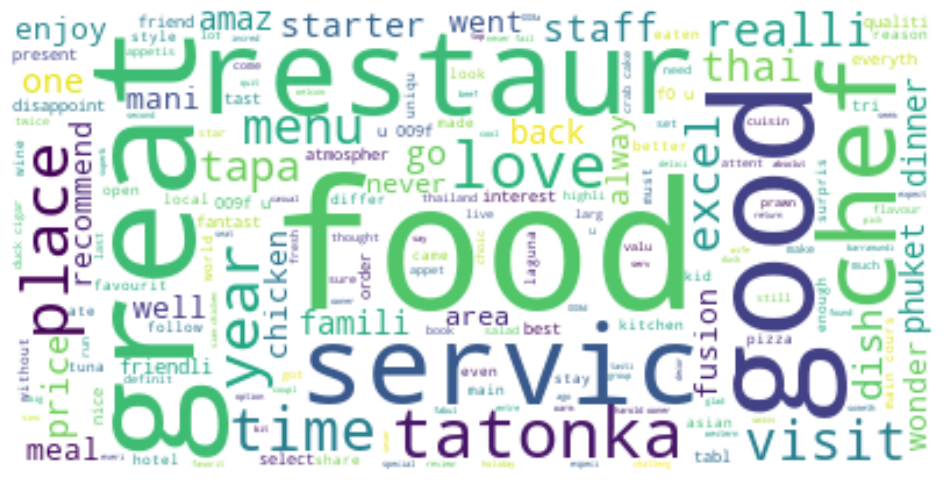

In [23]:
#Wordcloud of words from positive reviews by hotel/restaurant

pos_tokens = [word for review in newdata2_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
#use the nltk Freqency Distribution and then tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   food   great    good restaur  servic    chef tatonka       u    love   place 
     56      37      35      31      27      25      25      24      22      22 


In [25]:
#use the nltk FreqDist and then tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

   restaur      place disappoint       area        say       mani        saw       went    tatonka     caesar 
         5          5          4          4          3          3          3          2          2          2 


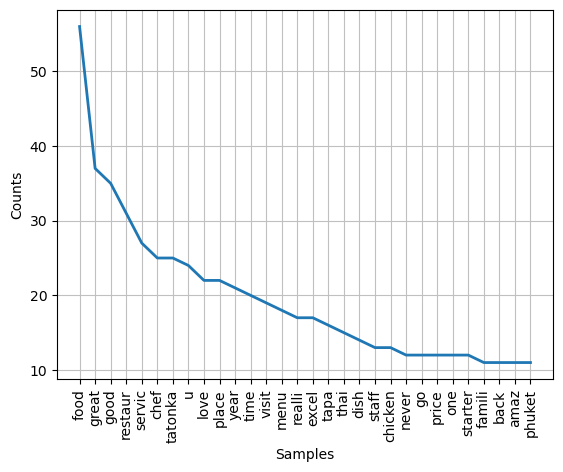

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
#Frequency Distribution plot for most frequent words in positive reviews
pos_freqdist.plot(30)

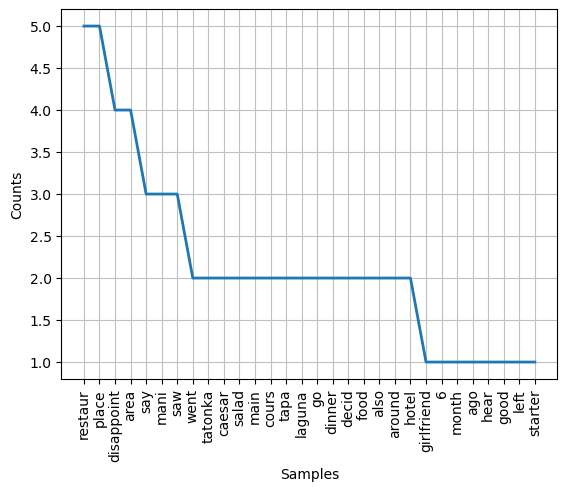

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
#Frequency Distribution plot for most frequent words in negative reviews
neg_freqdist.plot(30)